# MVP NBA: Analizando el Jugador Más Valioso con Aprendizaje Automático

**Integrantes:**
*   **Santino Semec**
*   **Gerardo Toboso**



## ¿Que es el premio MVP de la NBA?

El premio **MVP** (**Jugador Más Valioso**), como su nombre sugiere, se concede a los jugadores más destacados durante la temporada regular de la NBA. Dicha parte del calendario NBA **consta de 82 partidos** en la cual se definen a los equipos que luego pasarán a una ronda de eliminación.

El ganador del premio es **determinado mediante una votación** realizada por periodistas deportivos. Los tres jugadores más votados se convierten en finalistas y, finalmente, el jugador con la mayor cantidad de votos entre ellos se consagra como el ganador.

## Definiendo los objetivos

Cada temporada, siempre surge una gran discusión sobre el **Jugador Más Valioso** (MVP) de la NBA, el premio individual más importante que un jugador de baloncesto puede recibir. Y resulta complicado explicar los criterios de este premio a alguien que no está familiarizado con el deporte.

Algo que ya confunde a algunas personas es que el MVP no es un premio al mejor jugador, sino al jugador más valioso en la temporada regular. Entonces, surge la pregunta: **¿Qué significa ser más valioso?**

Significa que es el jugador con el mayor impacto positivo en su equipo. Esto implica que el desempeño del equipo también es una variable que influye en este premio individual, ya que debe tener un buen récord para respaldar ese impacto. Para lograrlo, el equipo debe contar con un buen grupo de apoyo para ayudar al MVP, ya que no puede ganar cada partido por sí solo. Sin embargo, el grupo de apoyo no puede ser demasiado bueno, ya que en ese caso no necesitarían al MVP para obtener una buena posición.

Esto en principio deja ver la **subjetividad** a la cual está sujeta el premio.

Con esto en mente, decidimos aplicar técnicas de Aprendizaje Automático para observar los patrones en la lógica de elección del MVP, determinar cuáles son las estadísticas más importantes en esta elección y si sería posible crear un modelo que, sea capaz de generar predicciones sobre quien puede ganar este premio en una próxima temporada.

# Preparando los datos

## Hacemos el setup y algunos importes



Importamos algunas librerías comunes y conectamos el cuaderno con google drive.

In [ ]:
#Para trabajo con el dataset
import numpy as np
import pandas as pd

#Para visualizar
import matplotlib.pyplot as plt
import seaborn as sns

#Planto la semilla
np.random.seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Leemos los archivos

Iniciamos seleccionando cuatro conjuntos de datos obtenidos [**NBA Stats (1947-present)**](https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats) que contienen información sobre jugadores a lo largo de todas las temporadas de la NBA. La elección de estos cuatro conjuntos de datos se fundamenta en las siguientes razones:

*   **df_premios_jugadores**: Este conjunto de datos presenta información detallada sobre todos los premios otorgados a lo largo de la historia de la NBA, incluyendo la proporción de votos obtenidos por los jugadores que fueron considerados para recibir dichos galardones. En última instancia, este dataframe se utilizará para el análisis del **premio MVP**.

*   **estadisticas_avanzadas**: Contiene una amplia variedad de estadísticas que son fundamentales para evaluar el rendimiento de los jugadores a lo largo de una temporada. Estas estadísticas incluyen índices de eficacia, el **PER** (Player Efficiency Rating), el impacto del rendimiento en la cancha y otros indicadores relevantes.

*   **estadisticas_tiro**: Al igual que el conjunto de datos de **estadisticas_avanzadas**, este conjunto proporciona diversas estadísticas sobre los jugadores en distintas temporadas. Sin embargo, se enfoca específicamente en las estadísticas relacionadas con el tiro, incluyendo mediciones de precisión desde diversas distancias y la proporción de cada tipo de tiro.

*   **estadisticas_por_juego**: Este conjunto de datos proporciona información detallada, partido tras partido, sobre las estadísticas individuales de un jugador mientras está en la cancha. Estos datos son especialmente valiosos, ya que permiten evaluar el rendimiento de los jugadores en cada juego, lo que es fundamental para comprender su contribución en cada encuentro.

In [ ]:
df_premios_jugadores = pd.read_csv('/content/drive/MyDrive/NBA_csvs/Player Award Shares.csv')
estadisticas_avanzadas = pd.read_csv('/content/drive/MyDrive/NBA_csvs/Advanced.csv')
estadisticas_tiro = pd.read_csv('/content/drive/MyDrive/NBA_csvs/Player Shooting.csv')
estadisticas_por_juego = pd.read_csv('/content/drive/MyDrive/NBA_csvs/Player Per Game.csv')

## Construyendo el conjunto de datos

Empezamos por dar un vistazo a las columnas de los datasets para ver cuales tienen en común entre sí para luego juntarlos en un **único dataset** el cual traerá toda la información a utilizar en el proyecto:

In [ ]:
def imprimir_columnas(titulo, columnas):
    print(f'{titulo}:')
    print(list(columnas))
    print()

imprimir_columnas('Columnas de df_premios_jugadores', df_premios_jugadores.columns)
imprimir_columnas('Columnas de estadisticas_avanzadas', estadisticas_avanzadas.columns)
imprimir_columnas('Columnas de estadisticas_tiro', estadisticas_tiro.columns)
imprimir_columnas('Columnas de estadisticas_por_juego', estadisticas_por_juego.columns)

Columnas de df_premios_jugadores:
['season', 'award', 'player', 'age', 'tm', 'first', 'pts_won', 'pts_max', 'share', 'winner', 'seas_id', 'player_id']

Columnas de estadisticas_avanzadas:
['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age', 'experience', 'lg', 'tm', 'g', 'mp', 'per', 'ts_percent', 'x3p_ar', 'f_tr', 'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent', 'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows', 'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp']

Columnas de estadisticas_tiro:
['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age', 'experience', 'lg', 'tm', 'g', 'mp', 'fg_percent', 'avg_dist_fga', 'percent_fga_from_x2p_range', 'percent_fga_from_x0_3_range', 'percent_fga_from_x3_10_range', 'percent_fga_from_x10_16_range', 'percent_fga_from_x16_3p_range', 'percent_fga_from_x3p_range', 'fg_percent_from_x2p_range', 'fg_percent_from_x0_3_range', 'fg_percent_from_x3_10_range', 'fg_percent_from_x10_16_range', 

Podemos observar que las columnas **'seas_id', 'season', 'player_id' y 'player'** funcionan como **identificadores** que facilitan la combinación de los
conjuntos de datos, si es necesario. Por otro lado, hay columnas comunes entre **estadísticas avanzadas** y **estadísticas de tiro** que contienen información idéntica. En consecuencia, se planea eliminar estas columnas de uno de los dos conjuntos de datos para evitar duplicaciones al combinarlos:

In [ ]:
#Guardo en una variable las columnas que me sirven para juntar los datasets
identificadores = ['seas_id', 'season', 'player_id','player']

#Me quedo con las columnas que me serán útiles de las estadisticas de tiro
columnas_utiles = [columna for columna in list(estadisticas_tiro.columns) if columna not in list(estadisticas_avanzadas.columns)]

#Como en las lineas anteriores eliminamos las columnas en común también se eliminaron los identificadores,
#por lo tanto los vuelvo a incluir en la lista de columnas útiles
for columna in identificadores:
  columnas_utiles.append(columna)

#Ahora me quedo con un dataframe con puramente información nueva
estadisticas_tiro = estadisticas_tiro.drop([columna for columna in list(estadisticas_tiro.columns) if columna not in columnas_utiles], axis = 1)

Aplicamos el mismo procedimiento para **estadisticas por juego**:

In [ ]:
#Me quedo con las columnas que me serán útiles de las estadisticas por partido
columnas_utiles = [columna for columna in list(estadisticas_por_juego.columns) if columna not in list(estadisticas_avanzadas.columns) and columna not in list(estadisticas_tiro.columns)]

#Vuelvo a agregarle los identificadores
for columna in identificadores:
  columnas_utiles.append(columna)

#Ahora me quedo con un dataframe con puramente información nueva
estadisticas_por_juego = estadisticas_por_juego.drop([columna for columna in list(estadisticas_por_juego.columns) if columna not in columnas_utiles], axis = 1)

En el caso de **df_premios_jugadores**, como se dijo anteriormente, este proyecto tratará sobre el **premio MVP** y de este conjunto de datos la variable que nos va a servir para nuestro objetivo será la columna **'mvp_share'**, que trae información sobre la proporción de votos que recibió un jugador para el premio. Por lo tanto procedo a quedarme con esa columna:

In [ ]:
#Me quedo con las instancias que traen información solo del premio al MVP
df_premios_jugadores = df_premios_jugadores[df_premios_jugadores["award"]=="nba mvp"]

#Eliminamos las columnas que no usaremos
df_premios_jugadores = df_premios_jugadores.drop(['award','age','tm','first','pts_won','pts_max','winner'], axis = 1)
df_premios_jugadores.rename(columns={'share': 'mvp_share'}, inplace=True)

Tras realizar las modificaciones necesarias, procedemos a fusionar los cuatro conjuntos de datos en uno único, denominado **df_data_jugadores**. Este conjunto de datos principal será el pilar fundamental de nuestro proyecto.

Además, como se puede observar, hemos aplicado un filtro para restringir el análisis a las temporadas **más recientes**. Esta selección tiene como objetivo mantener la coherencia con los cambios que han tenido lugar en la liga, evitando así posibles sesgos en nuestros modelos de trabajo.

In [ ]:
#Trabajo con las temporadas entre 2000 y 2023
estadisticas_tiro = estadisticas_tiro.loc[(estadisticas_tiro["season"] >=2000)]
estadisticas_avanzadas = estadisticas_avanzadas.loc[(estadisticas_avanzadas["season"] >=2000)]
df_premios_jugadores = df_premios_jugadores.loc[(df_premios_jugadores["season"] >=2000)]
estadisticas_por_juego = estadisticas_por_juego.loc[(estadisticas_por_juego["season"] >=2000)]

#Junto los datasets en uno solo que será el usado para el proyecto
df_data_jugadores = estadisticas_avanzadas.merge(estadisticas_tiro, on= identificadores, how='inner')
df_data_jugadores = df_data_jugadores.merge(df_premios_jugadores, on= identificadores, how='left')
df_data_jugadores = df_data_jugadores.merge(estadisticas_por_juego, on= identificadores, how='left')

#Finalmente miramos el dataset resultante
df_data_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14422 entries, 0 to 14421
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        14422 non-null  int64  
 1   season                         14422 non-null  int64  
 2   player_id                      14422 non-null  int64  
 3   player                         14422 non-null  object 
 4   birth_year                     153 non-null    float64
 5   pos                            14422 non-null  object 
 6   age                            14422 non-null  float64
 7   experience                     14422 non-null  int64  
 8   lg                             14422 non-null  object 
 9   tm                             14422 non-null  object 
 10  g                              14422 non-null  int64  
 11  mp                             14422 non-null  float64
 12  per                            14417 non-null 

Del output anterior pudimos notar que en la columna **'birth_year'** hay una gran cantidad de valores faltantes, además que saber la fecha en que nació un jugador no será de gran relevancia para los propositos del análisis, por lo tanto procedemos a eliminarla:

In [ ]:
df_data_jugadores.drop(['birth_year'], axis = 1, inplace= True)

Del mismo modo, existen columnas, como **'experience'**, que resultan redundantes en el análisis, ya que reflejan la cantidad de años que un jugador ha estado en la liga, información que puede deducirse fácilmente a partir de la columna **'season'**. Por lo tanto, procedemos a eliminarla:

In [ ]:
df_data_jugadores.drop(['experience'], axis = 1, inplace= True)

La columna **'tm'** contiene información sobre los equipos, y en ella encontramos una entrada con el nombre **'TOT'**. Sin embargo, **'TOT'** no representa un equipo en el sentido tradicional; más bien, se refiere a estadísticas totales de jugadores que **cambiaron de equipo** a mitad de temporada. Esta situación podría causar problemas, ya que se traduciría en datos duplicados para diferentes jugadores. Por lo tanto, hemos decidido eliminar estas entradas para garantizar la integridad de nuestros datos:

In [ ]:
df_data_jugadores.drop(df_data_jugadores[df_data_jugadores['tm'] == 'TOT'].index, inplace=True)

Ahora que disponemos del conjunto de datos que alberga la información relevante, nos encontramos en la fase final, que implica la selección de los jugadores idóneos para llevar a cabo un análisis preciso.

En un primer acercamiento, notamos que en la columna **'mvp_share'** (nuestro objetivo) contamos con instancias que representan temporadas en las que ciertos jugadores obtuvieron votos para el premio al **Jugador Más Valioso**. Son estos jugadores en quienes basaremos nuestro análisis, con el propósito de identificar acontecimientos significativos en el transcurso de sus carreras antes y después de recibir votos o ganar el premio. Incluso en casos excepcionales en los que algunos jugadores han ganado el premio en **múltiples ocasiones**, nuestro objetivo es identificar patrones comunes. Esto nos permitirá obtener una comprensión clara de los criterios que influyen en la obtención de tan prestigioso galardón.

In [ ]:
#Filtro las filas donde 'mvp_share' no sea un valor faltante
df_data_jugadores_mvp = df_data_jugadores[df_data_jugadores['mvp_share'].notna()]

#Armo una lista de nombres de jugadores con valor en 'mvp_share'
nombres_con_mvp_share = df_data_jugadores_mvp['player'].unique()

#Me quedo con las instancias cuyo nombre está en la lista
df_data_jugadores = df_data_jugadores[df_data_jugadores['player'].isin(nombres_con_mvp_share)]

#Veo el resultado
df_data_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 24 to 14407
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        1269 non-null   int64  
 1   season                         1269 non-null   int64  
 2   player_id                      1269 non-null   int64  
 3   player                         1269 non-null   object 
 4   pos                            1269 non-null   object 
 5   age                            1269 non-null   float64
 6   lg                             1269 non-null   object 
 7   tm                             1269 non-null   object 
 8   g                              1269 non-null   int64  
 9   mp                             1269 non-null   float64
 10  per                            1269 non-null   float64
 11  ts_percent                     1269 non-null   float64
 12  x3p_ar                         1269 non-null  

Como mencionamos anteriormente, para hacer un análisis más robusto nos enfocaremos en temporadas cercanas a la temporada en la cual un jugador recibió votos, entonces dicho esto procedemos a hacer un último filtrado:

In [ ]:
def crear_df_jugador(jugador:str, dataframe):
    df_info_jugador = dataframe[dataframe['player'] == jugador]

    return df_info_jugador

def filtrar_temporadas_jugador(df_jugador):

    #Inicializo una lista para quedarme con las temporadas de interés
    temporadas_interesantes = []

    #Con el dataframe del jugador voy iterando fila por fila
    for index, fila in df_jugador.iterrows():

      #Voy iterando hata encontrame con una fila sin valor nulo en 'mvp_share'
        if not pd.isna(fila['mvp_share']):

            #Usando el criterio me quedo con las temporadas de interés
            temporada_actual = fila['season']
            temporada_anterior = temporada_actual - 1
            temporada_siguiente = temporada_actual + 1

            #Incluyo las temporadas a la lista
            temporadas_interesantes.append(temporada_actual)

            if temporada_anterior >= 2000:
              temporadas_interesantes.append(temporada_anterior)

            if temporada_siguiente <= 2023:
              temporadas_interesantes.append(temporada_siguiente)

    #Aplico el filtro al DataFrame del jugador para incluir solo las temporadas de interés
    filtro_temporadas_interesantes = df_jugador['season'].isin(temporadas_interesantes)
    jugador_filtrado = df_jugador[filtro_temporadas_interesantes]

    return jugador_filtrado


def filtrar_temporadas_jugadores(dataframe):
    jugadores_unicos = dataframe['player'].unique()  # Obtiene la lista de jugadores únicos

    # Inicializa un DataFrame vacío donde se concatenarán los resultados
    resultado_final = pd.DataFrame()

    # Itera sobre la lista de jugadores únicos
    for jugador in jugadores_unicos:
        jugador_filtrado = filtrar_temporadas_jugador(crear_df_jugador(jugador, dataframe))
        resultado_final = pd.concat([resultado_final, jugador_filtrado])

    return resultado_final

#Aplico el filtro a todos los jugadores en el DataFrame general
df_data_jugadores = filtrar_temporadas_jugadores(df_data_jugadores)

Después de aplicar el filtro necesario, hemos obtenido el conjunto de datos que emplearemos en el proyecto. Como paso final, procederemos a **imputar el valor 0** en las celdas con datos faltantes en la variable **'mvp_share'**. Esta acción se justifica, ya que la ausencia de un valor en esta columna indica que el jugador no recibió votos, lo que es equivalente a asignarle un valor de 0 votos.

In [ ]:
#Imputo los ceros
df_data_jugadores['mvp_share'].fillna(0, inplace=True)

#Miro los resultados
df_data_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 1520 to 13218
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        585 non-null    int64  
 1   season                         585 non-null    int64  
 2   player_id                      585 non-null    int64  
 3   player                         585 non-null    object 
 4   pos                            585 non-null    object 
 5   age                            585 non-null    float64
 6   lg                             585 non-null    object 
 7   tm                             585 non-null    object 
 8   g                              585 non-null    int64  
 9   mp                             585 non-null    float64
 10  per                            585 non-null    float64
 11  ts_percent                     585 non-null    float64
 12  x3p_ar                         585 non-null  

## Separamos los datos

Después de adquirir el conjunto de datos con el que trabajaremos, debemos realizar un último paso: la división de los datos en conjuntos de **entrenamiento y prueba**:


In [ ]:
#Selecciono a los jugadores
df_giannis = crear_df_jugador('Giannis Antetokounmpo',df_data_jugadores)
df_embiid = crear_df_jugador('Joel Embiid',df_data_jugadores)
df_jokic = crear_df_jugador('Nikola Jokić',df_data_jugadores)
df_harden = crear_df_jugador('James Harden',df_data_jugadores)
df_lebron = crear_df_jugador('LeBron James',df_data_jugadores)

#Selecciono ahora sus nombres
nombres_a_eliminar = ['Giannis Antetokounmpo', 'Joel Embiid','Nikola Jokić','LeBron James','James Harden']

#Los elimino del dataset original para ahora convertirlo en un train
df_data_jugadores_train  = df_data_jugadores[~df_data_jugadores['player'].isin(nombres_a_eliminar)]
df_data_jugadores_train  = df_data_jugadores_train[df_data_jugadores_train['season'] < 2022]

#Junto todos esos dataframes en el test que evaluaremos al final
df_data_jugadores_test  = df_data_jugadores[df_data_jugadores['season'] >= 2022]

Como se ha podido observar, consideramos como instancias de entrenamiento a las que se ubicaban entre las temporadas **2000 y 2021**, y como datos de prueba dejamos fuera **las últimas dos temporadas**, esto con el objetivo de predecir las premiaciones más recientes.

Además decidimos realizar una separación un tanto particular en nuestro enfoque. Optamos por seleccionar **ciertos jugadores** que han ganado el premio en los años recientes y **apartarlos del conjunto de datos de entrenamiento**. Esta elección se basa en la idea de utilizarlos como un grupo de **"prueba"** para evaluar adecuadamente la capacidad de generalización de nuestro modelo.

# Analizando los datos

Como primer paso del análisis miramos las correlaciones del resto de variables con respecto a la variable objetivo la cual es **'mvp_share'**. Esto nos servirá para tener una idea inicial sobre a cuales features darles importancia o que esperar sobre nuestro modelo.

In [ ]:
corr_matrix = df_data_jugadores_train.corr()
print(corr_matrix["mvp_share"].sort_values(ascending=False).head(15))

mvp_share       1.000000
vorp            0.553986
ws              0.508459
per             0.483577
bpm             0.470015
ws_48           0.447815
ows             0.441783
obpm            0.434651
pts_per_game    0.351145
fg_per_game     0.349332
dws             0.343751
fta_per_game    0.298962
x2p_per_game    0.281425
ft_per_game     0.278470
usg_percent     0.277086
Name: mvp_share, dtype: float64


<ipython-input-17-7cb2835dea26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_data_jugadores_train.corr()


Podemos observar que entre las características que presentan una mayor correlación con nuestra variable objetivo se encuentran:

*   **'vorp' (Value over Replacement Player)**: Es una estadística avanzada que busca cuantificar el valor total que un jugador aporta a su equipo en comparación con un jugador genérico de reemplazo que estaría disponible para jugar en su lugar.

*   **'bpm' (Box Plus/Minus)**: Calcula el más/menos de un jugador respecto al rendimiento del equipo por cada 100 posesiones.

*   **'per' (Player Efficiency Rating)**: Una fórmula que calcula la **eficencia de un jugador en base a lo que produce por minuto**. El PER toma en cuenta los aciertos en tiros de campo, tiros libres, triples, asistencias, rebotes, tapones y robos, y los errores como tiros fallados, pérdidas de balón y faltas personales. La fórmula agrega estadísticas positivas y resta las negativas a través de un sistema de valores de puntos estadísticos. Este sistema fue **desarrollado por [John Hollinger](https://en.wikipedia.org/wiki/John_Hollinger)**.

*   **'ws' (Win Shares)**: Indice que reparte el éxito de un equipo entre cada uno de los individuos de ese equipo, estimando el número de victorias que genera un jugador en base a estadísticas individuales, de equipo y de toda la Liga.

*   **'ws_48' (Win Shares per 48 min)**:
Es igual a la estadística definida anteriormente, pero esta se basa en 48 minutos porque esa es la duración exacta de un partido de la NBA. Por lo tanto, esta estadística puede medir cuánto contribuye un jugador a un esfuerzo ganador en función de su desempeño por minuto en cada partido.

*   **'obpm' (Offensive Box Plus/Minus)**: El Box Plus/Minus ofensivo (OBPM) es una estadística en baloncesto que mide la contribución de un jugador en términos de puntos por encima del promedio de la liga por cada 100 posesiones jugadas, centrándose exclusivamente en su rendimiento ofensivo. Muestra cuánto un jugador mejora la producción ofensiva de su equipo cuando está en la cancha.

La alta correlación de estas características con la variable objetivo no es coincidencia, ya que concuerda con lo que mencionamos anteriormente sobre el significado de **ser el jugador más valioso**. Se refiere a un jugador que tiene un impacto positivo significativo en su equipo en comparación con sus compañeros.

Ahora con esto en mente, procedemos a ver de forma gráfica estas correlaciones para darnos una idea más clara de lo que está ocurriendo:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

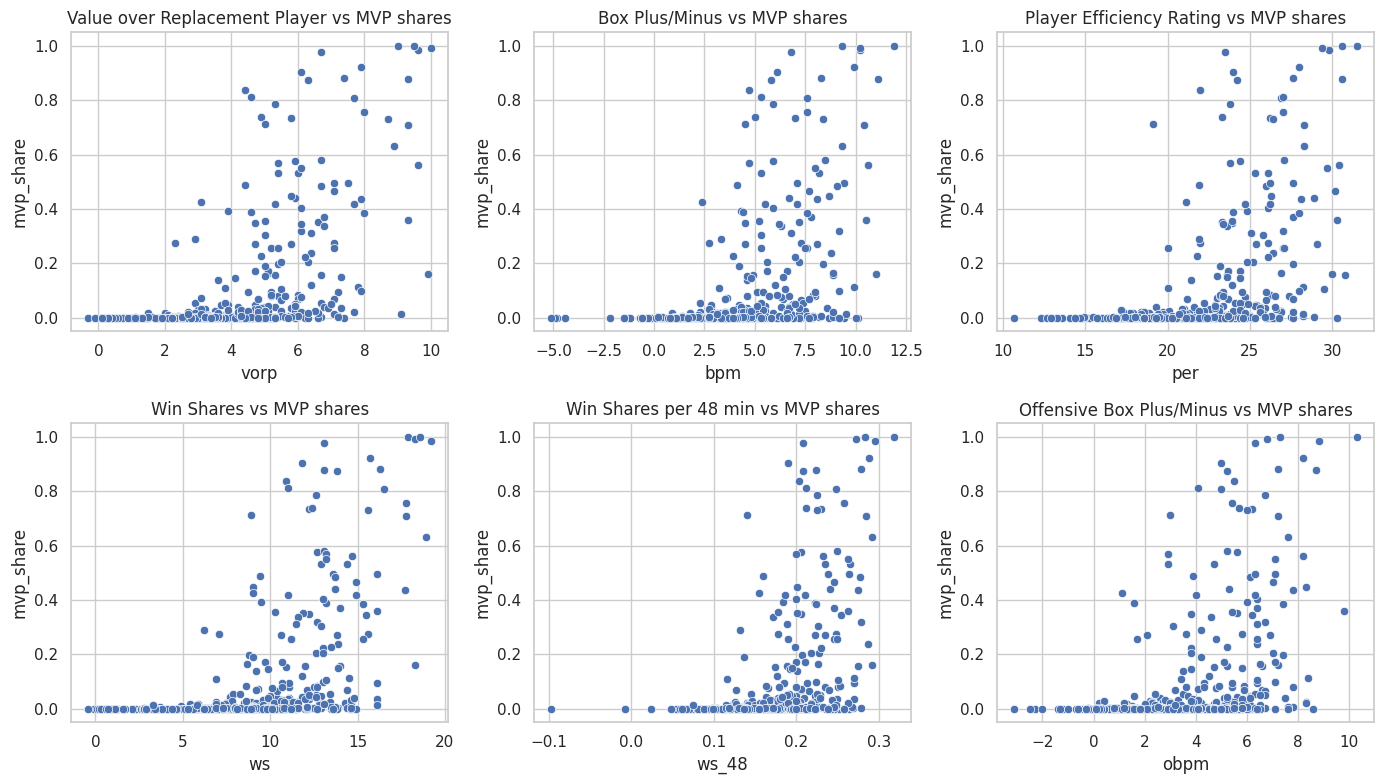

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

columnas = ['vorp', 'bpm', 'per', 'ws', 'ws_48', 'obpm']
titulos = ['Value over Replacement Player', 'Box Plus/Minus', 'Player Efficiency Rating', 'Win Shares', 'Win Shares per 48 min', 'Offensive Box Plus/Minus']

for i, col in enumerate(columnas):
    sns.scatterplot(x=col, y='mvp_share', data=df_data_jugadores_train, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{titulos[i]} vs MVP shares')

plt.tight_layout()

Podemos notar que en los cinco atributos, la relación con **'mvp_share'** es positiva y ascendente. Este gráfico nos brinda una herramienta valiosa para identificar los **"destacados"** entre los jugadores, aquellos que recibieron una considerable cantidad de votos, lo que sugiere que tuvieron temporadas excepcionales.

Ahora analizaremos como se distribuyen estos datos para detectar la existencia de grupos entre los jugadores con respecto a estos atributos:

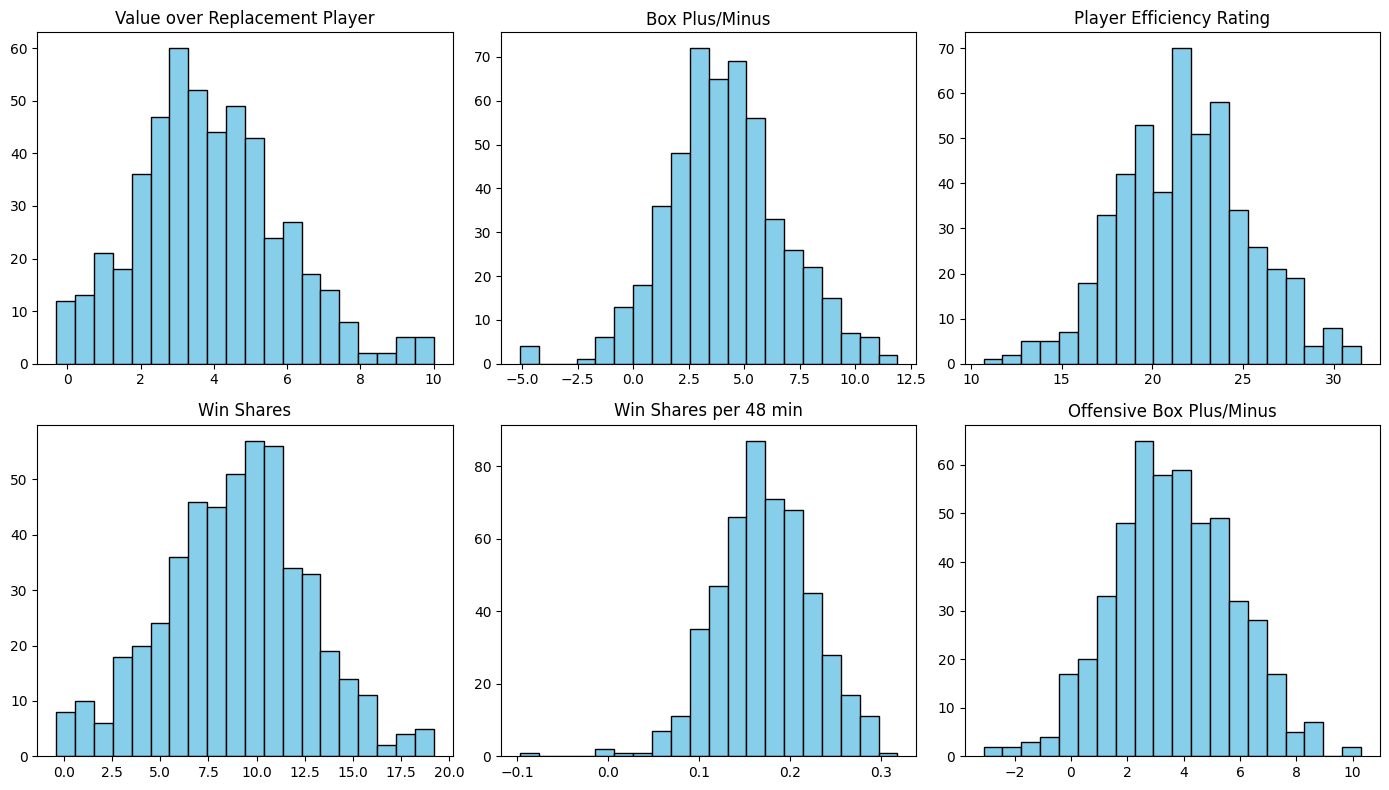

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

columnas = ['vorp', 'bpm', 'per', 'ws', 'ws_48', 'obpm']
titulos = ['Value over Replacement Player', 'Box Plus/Minus', 'Player Efficiency Rating', 'Win Shares', 'Win Shares per 48 min', 'Offensive Box Plus/Minus']

for i, col in enumerate(columnas):
    axes[i // 3, i % 3].hist(df_data_jugadores_train[col], bins=20, color='skyblue', edgecolor='black')
    axes[i // 3, i % 3].set_title(f'{titulos[i]}')

plt.tight_layout()

Todo sugiere que tenemos una distribución uniforme en las variables de interés. Esto indica que, hasta el momento, nuestros datos no presentan ningún problema aparente.

Luego de un exhaustivo análisis de datos, optamos por seleccionar features **basándonos en la correlación** que presentan con nuestro objetivo. Inicialmente, nos enfocaremos en aquellas con una correlación **superior a 0.25**. Aunque solo se presentan algunas, estas variables parecen ser predictores valiosos, ya que cada una resalta un aspecto específico del jugador. En consecuencia, hemos decidido emplear las **14 features** que cumplen con la correlación que deseamos.

In [ ]:
correlated_features = corr_matrix["mvp_share"].sort_values(ascending=False).index.tolist()[1:15]

# Preprocesamiento de datos

Hasta este punto, hemos creado un conjunto de datos para el proyecto, analizado los datos y descubierto patrones que pueden resultar valiosos al desarrollar el modelo final. El siguiente paso consiste en preparar estas variables de interés para su uso en el entrenamiento de nuestro modelo.

Primero procederemos a separar las variables en **X_train** (que contendrá las  candidatas a variables predictoras) y **y_train** (donde ubicaremos nuestra variable objetivo, **'mvp_share'**).

In [ ]:
X_train = df_data_jugadores_train.loc[:, correlated_features]
y_train = df_data_jugadores_train.loc[:, ['mvp_share']]

Comencemos por verificar si existen valores faltantes en **X_train**. Dado que ya hemos imputado el valor cero en toda la variable **y_train**, no es necesario hacer esta misma examinación en ella.

In [ ]:
#Guardo la suma de valores faltantes por columna
valores_faltantes = X_train.isnull().sum()

print(valores_faltantes)

vorp            0
ws              0
per             0
bpm             0
ws_48           0
ows             0
obpm            0
pts_per_game    0
fg_per_game     0
dws             0
fta_per_game    0
x2p_per_game    0
ft_per_game     0
usg_percent     0
dtype: int64


Observamos que en nuestras variables de interés no contamos con valores faltantes, por lo tanto podemos proseguir con la estandarización de los datos:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Genero un pipeline
pip = Pipeline([
 ('std_scaler', StandardScaler())
 ])

#Aplico la transformación
X_train_prepared = pip.fit_transform(X_train)

# Trabajando el modelo

Ahora, llegamos a la etapa en la que comenzamos a modelar nuestros datos y explorar qué información relevante pueden proporcionarnos, lo que constituye el núcleo de nuestro proyecto. Nuestro criterio para determinar la idoneidad de un modelo se basa en su capacidad para minimizar el error en las predicciones y así poder ubicar de manera correcta a los jugadores que están en **el podio del premio**.

## Definición de funciones útiles

Antes de empezar con el proceso de entrenamiento de un modelo, decidimos generar algunas funciones que nos serán útiles para luego simplicar este proceso:

In [ ]:
from sklearn.model_selection import cross_validate, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

#Defino una grilla de métricas para regresión
regression_scores = {'R^2 score' : 'r2',
                     'Explained Variance':'explained_variance',
                     'MSE':'neg_mean_squared_error',
                     'RMSE' : make_scorer(mean_squared_error, squared=False),
                     }

#Hago una función para la validación cruzada
def cross_validation_scores(model, X, y, scoring, CV):
    '''
    Métricas de validación cruzada

    param_model: modelo
    param_X: características
    param_y: etiqueta objetivo
    param_scoring: una selección de métricas
    param_CV: cantidad de divisiones para la validación cruzada
    '''

    # Instancio el objeto TimeSeriesSplit para dividir en series de tiempo
    tscv = TimeSeriesSplit(n_splits=CV)

    scores = cross_validate(model, X, y.values.ravel(), scoring=scoring, cv=tscv)

    #Obtengo el puntaje promedio y la desviación estandar de cada modelo
    return {metric: (round(np.mean(scores), 3)) for metric, scores in scores.items()}

def mostrar_podio_MVP(temporada:int, y_pred, df_base:pd.DataFrame, cant_jugadores:int):
    '''
    Esta función toma las predicciones generadas por el modelo
    en cuestión y retorna un dataframe de las mismas junto
    con el valor real por cada temporada y jugador.
    '''

    # Genero un dataframe donde guardo las predicciones y el valor real
    df_comp = df_base[['season', 'player', 'mvp_share']]
    df_comp['y_pred'] = y_pred.flatten()
    df_comp = df_comp.sort_values(by='y_pred', ascending=False)

    return df_comp[df_comp['season'] == temporada].head(cant_jugadores)


## Random Forest

El modelo que hemos decidido utilizar es el **Random Forest**. Según nuestro criterio, este modelo es adecuado para evitar el **sobreajuste** y tiene la capacidad de generalizar bien con los datos disponibles. Además, es altamente útil para evaluar la **importancia** de cada atributo que utilizamos en el proceso de entrenamiento. Esto, a su vez, nos proporciona una comprensión más profunda de **cómo opera el premio** y los factores que influyen en él.

Emplearemos **RandomizedSearchCV** para encontrar la combinación óptima de hiperparámetros para nuestro modelo. Hemos elegido una grilla de hiperparámetros extensa con el fin de garantizar una búsqueda precisa y obtener una comprensión sólida de nuestros requisitos.

In [ ]:
#Instancio el modelo
forest_reg = RandomForestRegressor()

#Preparo la grilla de hipérparametros
param_grid = {
    'n_estimators': list(range(1, 1000)),
    'max_features': ['auto', 'sqrt'],
    'max_depth': list(range(1, 500)),
    'bootstrap': [True, False],
    'criterion': ['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

#Instancio de vuelta otro objeto tscv para mantener el orden con el tiempo
tscv = TimeSeriesSplit(n_splits=3)

#Hago la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_grid, n_iter=100, cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
random_search.fit(X_train_prepared, y_train)

#Miro los mejores hipérparametros
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros encontrados: {'n_estimators': 134, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 253, 'criterion': 'friedman_mse', 'bootstrap': True}


Ahora que realizamos este procedimiento, **guardaremos los hiperparámetros** obtenidos en nuestro modelo Random Forest para luego utilizar el mismo:

In [ ]:
forest_reg_best = RandomForestRegressor(
    random_state=42,
    n_estimators=566,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='auto',
    max_depth=254,
    criterion='poisson',
    bootstrap=True
)
forest_reg_best.fit(X_train_prepared, y_train)
y_train_pred = forest_reg_best.predict(X_train_prepared)

Ahora con este modelo, usaremos las funciones definidas anteriormente para evaluar su desempeño:

In [ ]:
#Uso función de validación cruzada
print("Métricas usando validación cruzada:")
print(cross_validation_scores(forest_reg_best, X_train_prepared, y_train, regression_scores, 2))
print()
#Ahora evaluo las mismas métricas pero en el dataset de Train completo
r2_train = r2_score(y_train, y_train_pred)
explained_variance_train = explained_variance_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print("Métricas en el conjunto de entrenamiento:")
print(f"Coeficiente de determinación (R²): {r2_train:.4f}")
print(f"Varianza explicada: {explained_variance_train:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse_train:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_train:.4f}")

Métricas usando validación cruzada:
{'fit_time': 1.151, 'score_time': 0.02, 'test_R^2 score': 0.342, 'test_Explained Variance': 0.346, 'test_MSE': -0.024, 'test_RMSE': 0.154}

Métricas en el conjunto de entrenamiento:
Coeficiente de determinación (R²): 0.7925
Varianza explicada: 0.7925
MSE (Error Cuadrático Medio): 0.0081
RMSE (Raíz del Error Cuadrático Medio): 0.0899


Observamos una diferencia notable en el rendimiento del modelo al utilizar la validación cruzada en comparación con la evaluación directa en el conjunto de datos de entrenamiento. Este contraste podría deberse a la variabilidad introducida por la validación cruzada, que refleja cómo el modelo generaliza en diferentes conjuntos de datos de prueba durante cada iteración del proceso de validación cruzada. Por otro lado, la evaluación en el conjunto de entrenamiento se realiza en datos con los que el modelo ya ha sido entrenado, lo que puede llevar a una representación más optimista del rendimiento. La diferencia en el R², la Varianza Explicada y otras métricas puede indicar cómo el modelo se desempeña en datos nuevos frente a datos ya conocidos durante el entrenamiento. Es crucial tener en cuenta esta diferencia al realizar evaluaciones futuras de nuestro modelo, esto ya nos dá una fuerte idea de como se podría comportar a futuro.

Ahora procedemos a realizar un análisis gráfico del modelo, representando gráficamente los valores reales de la variable objetivo **'mvp_share'** frente a los valores predichos por nuestro modelo:

Text(0.5, 1.0, 'Comparación: Valores de datos de entrenamiento vs Predicción del modelo')

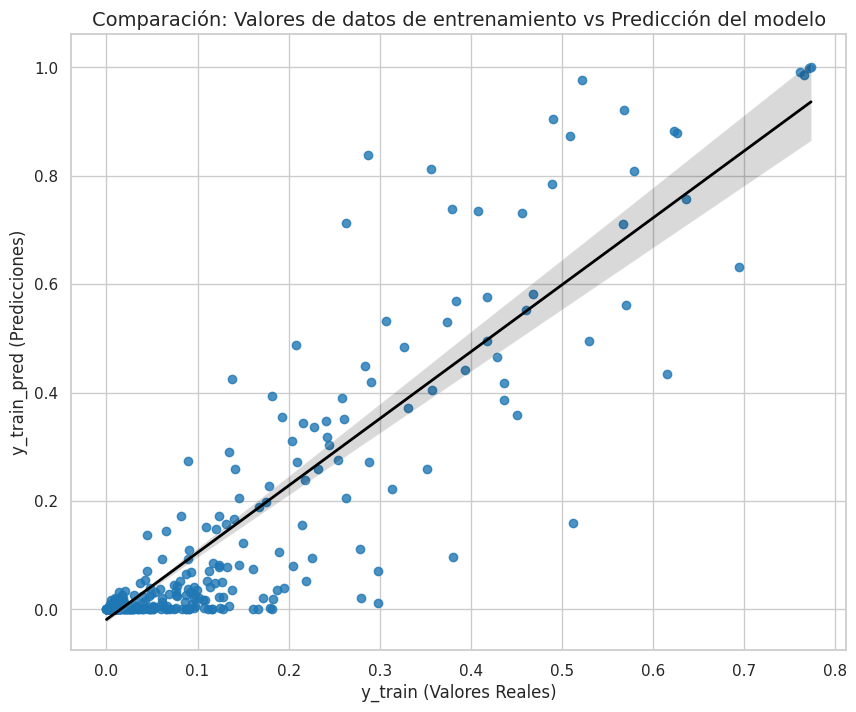

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.regplot(x=y_train_pred, y=y_train, scatter_kws={'color': '#1f77b4'}, line_kws={'color': 'black', 'linewidth': 2})
plt.xlabel('y_train (Valores Reales)')
plt.ylabel('y_train_pred (Predicciones)')
plt.title('Comparación: Valores de datos de entrenamiento vs Predicción del modelo', fontsize=14)

Gráficamente, evidenciamos que nuestro modelo se ajusta de **manera precisa** a los datos de entrenamiento, como habíamos observado al analizar las métricas. Además, **el ajuste no es excesivamente pronunciado**, indicando que el modelo no sobreajusta nuestros datos. Esta observación es satisfactoria, ya que sugiere que estamos frente a un modelo aceptable.

Como conclusión, emplearemos otra de las funciones previamente definidas para visualizar cómo posiciona nuestro modelo a los jugadores en la votación. Esta métrica es crucial, ya que nuestro objetivo principal era desarrollar un modelo que minimizara el error al posicionar correctamente a los jugadores. Una vez logrado este objetivo, podemos realizar un análisis más preciso del premio. A continuación, presentamos algunas temporadas anteriores para evaluar el rendimiento de nuestro modelo:

In [ ]:
mostrar_podio_MVP(temporada = 2011, y_pred = y_train_pred, df_base = df_data_jugadores_train, cant_jugadores= 5)

,season,player,mvp_share,y_pred
7948,2011,Derrick Rose,0.977,0.521975
7962,2011,Dwight Howard,0.531,0.373768
7963,2011,Dwyane Wade,0.020,0.279559
8138,2011,Kobe Bryant,0.354,0.193065
8129,2011,Kevin Durant,0.157,0.131341


In [ ]:
mostrar_podio_MVP(temporada = 2014, y_pred = y_train_pred, df_base = df_data_jugadores_train, cant_jugadores= 5)

,season,player,mvp_share,y_pred
6387,2014,Kevin Durant,0.986,0.765787
6106,2014,Blake Griffin,0.347,0.241442
6389,2014,Kevin Love,0.020,0.171865
6338,2014,Joakim Noah,0.258,0.141262
6591,2014,Stephen Curry,0.053,0.109995


In [ ]:
mostrar_podio_MVP(temporada = 2016, y_pred = y_train_pred, df_base = df_data_jugadores_train, cant_jugadores= 5)

,season,player,mvp_share,y_pred
5328,2016,Stephen Curry,1.000,0.773776
5297,2016,Russell Westbrook,0.371,0.331645
5128,2016,Kawhi Leonard,0.484,0.326973
5138,2016,Kevin Durant,0.112,0.278010
4912,2016,Chris Paul,0.082,0.124049


In [ ]:
mostrar_podio_MVP(temporada = 2017, y_pred = y_train_pred, df_base = df_data_jugadores_train, cant_jugadores= 5)

,season,player,mvp_share,y_pred
4710,2017,Russell Westbrook,0.879,0.626087
4536,2017,Kawhi Leonard,0.495,0.417489
4439,2017,Isaiah Thomas,0.080,0.205262
4252,2017,Anthony Davis,0.002,0.179863
4736,2017,Stephen Curry,0.051,0.126535


Podemos notar que, aunque existe una diferencia entre los valores de **'mvp_share'** y **'y_pred'**, nuestro modelo **logró ordenar de manera efectiva** a los jugadores, identificando correctamente a los ganadores de los años seleccionados. Sin embargo, es crucial recordar que estamos utilizando **datos de entrenamiento** y la verdadera prueba se llevará a cabo en los datos reservados para pruebas. A continuación, proporcionamos una lista de los últimos ganadores del premio para que puedan verificar la precisión de nuestro modelo:

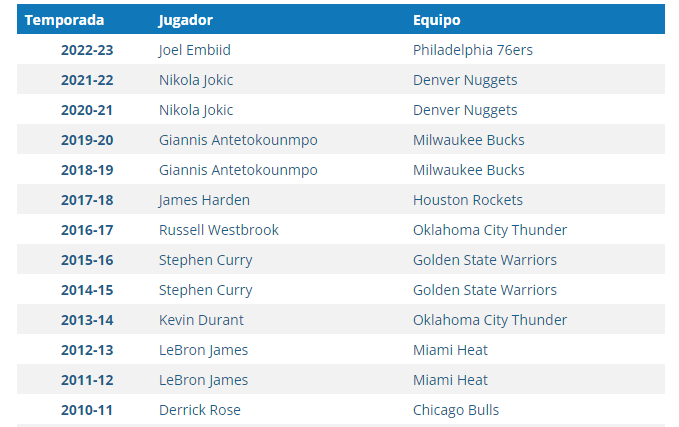

Ahora que contamos con un modelo que **consideramos aceptable** y ha demostrado un buen rendimiento en los datos de entrenamiento, tanto en métricas como en su capacidad para **posicionar correctamente a los jugadores**, avanzamos hacia la **fase final**. En esta etapa, pondremos a prueba el mismo modelo con los datos de prueba y posteriormente extraeremos nuestras conclusiones al respecto.

# Prueba final en los conjuntos de datos de prueba

Luego de seleccionar el modelo que consideramos **óptimo** para los objetivos de nuestro proyecto, nos embarcamos en la última fase: **evaluar su rendimiento con datos de prueba**. Esta etapa implica poner a prueba nuestro modelo utilizando los conjuntos de datos reservados para cada jugador desde el inicio del proyecto con este propósito específico.

Empezamos por generar las predicciones para todo el conjunto de test:

In [ ]:
#Guardo y_test para evaluaciones futuras
y_test = df_data_jugadores_test.loc[:, ['mvp_share']]

#Preproceso las variables X de test
X_test = df_data_jugadores_test.loc[:, correlated_features]
X_test_prepared = pip.transform(X_test)

#Tomo el modelo y hago las predicciones en test
y_test_pred = forest_reg_best.predict(X_test_prepared)

Ahora, al igual que hicimos con los datos de entrenamiento, vamos a evaluar las métricas de este modelo para el dataset de prueba:

In [ ]:
r2_test = r2_score(y_test, y_test_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print("Métricas en el conjunto de entrenamiento:")
print(f"Coeficiente de determinación (R²): {r2_test:.4f}")
print(f"Varianza explicada: {explained_variance_test:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse_test:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_test:.4f}")

Métricas en el conjunto de entrenamiento:
Coeficiente de determinación (R²): 0.6666
Varianza explicada: 0.6684
MSE (Error Cuadrático Medio): 0.0221
RMSE (Raíz del Error Cuadrático Medio): 0.1487


De estas métricas, podemos apreciar que, aunque no logró un rendimiento tan cercano al obtenido con los datos de entrenamiento (lo cual es común), aún mantenemos **métricas bastante razonables**. Esto indica que nuestro modelo no ha caído en un **caso de subajuste** y sugiere que puede alcanzar un rendimiento aceptable al evaluarlo con otras métricas.

Ahora procedemos a ver gráficamente como se comparan las predicciones de nuestro modelo respecto del valor real que toma la variable **'mvp_share'**:

Text(0.5, 1.0, 'Comparación: Valores de datos de prueba vs Predicción del modelo')

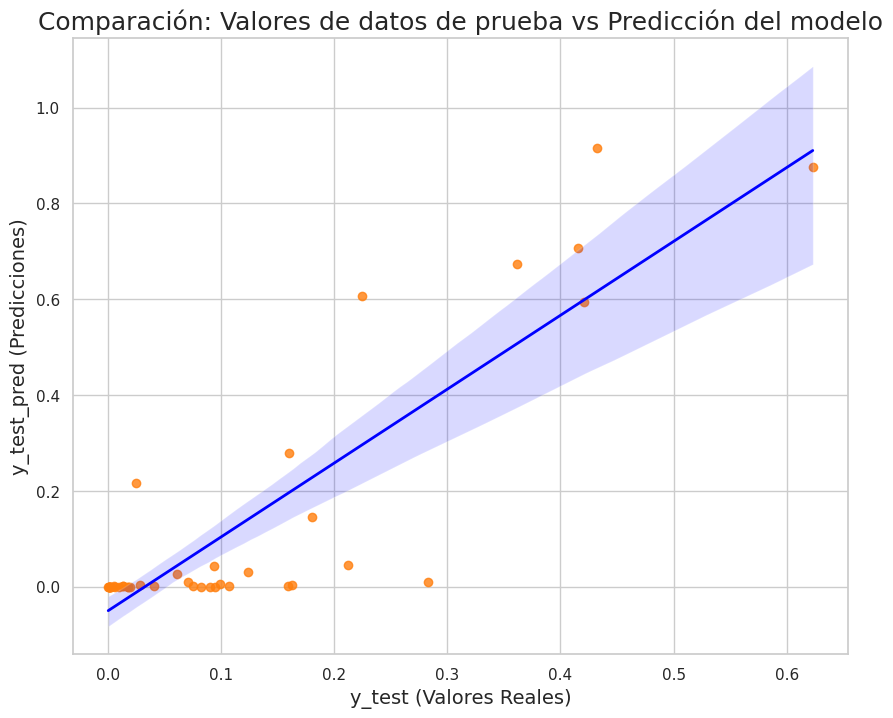

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test_pred, y=y_test, scatter_kws={'color': '#ff7f0e'}, line_kws={'color': 'blue', 'linewidth': 2})
plt.xlabel('y_test (Valores Reales)', fontsize=14)
plt.ylabel('y_test_pred (Predicciones)', fontsize=14)
plt.title('Comparación: Valores de datos de prueba vs Predicción del modelo', fontsize=18)

De este gráfico, podemos observar que las predicciones generadas por nuestro modelo están algo más dispersas en comparación con la línea azul de regresión. Además, notamos que, para valores altos de **'y_test'**, la variabilidad de los datos aumenta, lo cual podría conducir a algunas sorpresas al momento de presentar los podios predichos por nuestro modelo. A pesar de esto, hay que resaltar que nuestro modelo ha logrado mantener la tendencia general de los datos.

Ahora como evaluación final, vamos a ver que tan bien nuestro modelo logra pocisionar a los jugadores reservados para la prueba para así luego sacar nuestras conclusiones sobre lo obtenido:

In [ ]:
mostrar_podio_MVP(temporada = 2022, y_pred = y_test_pred, df_base = df_data_jugadores_test, cant_jugadores = 5)

,season,player,mvp_share,y_pred
1279,2022,Nikola Jokić,0.875,0.623029
950,2022,Giannis Antetokounmpo,0.595,0.420878
1065,2022,Joel Embiid,0.706,0.415259
1190,2022,Luka Dončić,0.146,0.180019
1182,2022,LeBron James,0.001,0.159342


In [ ]:
mostrar_podio_MVP(temporada = 2023, y_pred = y_test_pred, df_base = df_data_jugadores_test, cant_jugadores = 5)

,season,player,mvp_share,y_pred
306,2023,Joel Embiid,0.915,0.432154
506,2023,Nikola Jokić,0.674,0.361984
422,2023,Luka Dončić,0.010,0.283334
207,2023,Giannis Antetokounmpo,0.606,0.224493
588,2023,Shai Gilgeous-Alexander,0.046,0.211966


Lo primero que destaca es la persistencia de diferencias entre el valor de **'mvp_share'** predicho por el modelo y el valor real, más notablemente en casos recientes, como con **Joel Embiid en 2023**, donde la diferencia es de 0**.915 (valor real) a 0.425585 (predicho por el modelo)**. Esta disparidad coincide con las observaciones del gráfico anterior, donde notamos un aumento significativo en la variabilidad de las predicciones para valores altos de **'mvp_share'**.

A pesar de esto, nos complace observar que nuestro modelo **identificó correctamente al ganador** en cada uno de los años seleccionados, cumpliendo así con el **objetivo fundamental** para el cual fue desarrollado. A continuación, presentamos nuevamente una representación visual con los últimos ganadores del premio para que puedan corroborar esta información:

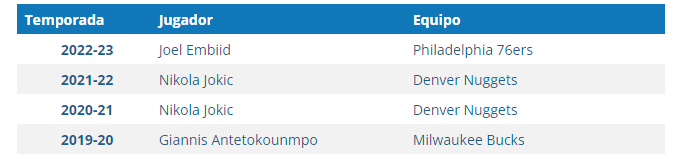

##Entendiendo el modelo

Para concluir, también deseamos abordar algunos **casos particulares** que se presentaron en los posicionamientos generados por el modelo, los cuales se mostraron anteriormente. Estos casos involucran a jugadores que fueron incluidos entre los cinco principales votados cuando, en realidad, no estuvieron allí, y a jugadores que no fueron incluidos pero que sí estaban presentes (en 2022 y 2023). Específicamente, estos jugadores son:

*   **LeBron James** - **Devin Booker** (2022)
*   **Luka Dončić** - **Jayson Tatum** (2023)

En el caso de **LeBron James**, tenemos que según nuestro modelo en la temporada 2022 este mismo ocupaba la quinta posición del podio, cosa que realmente no fue así (se puede verificar su posición real [aquí](https://es.wikipedia.org/wiki/Anexo:Votaci%C3%B3n_del_MVP_de_la_NBA_2021-22)). A continuación mostramos una imagen del podio real para ganar el premio:

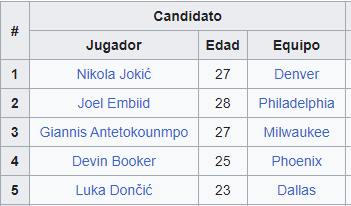

Observamos que en la posición que solía ocupar **LeBron James**, se encuentra **Luka Dončić**, a quien nuestro modelo colocó en la cuarta posición. También observamos el caso de **Devin Booker**, quien **no estaba** en el podio predicho por nuestro modelo. Esto sugiere que, aunque nuestro modelo identifica correctamente al ganador del premio, enfrenta desafíos al posicionar jugadores en **lugares inferiores**.

Si observamos donde quedó **Devin Booker** según nuestro modelo para esta temporada, nos daremos cuenta que obtuvo una posición bastante baja:

In [ ]:
mostrar_podio_MVP(temporada = 2022, y_pred = y_test_pred, df_base = df_data_jugadores_test, cant_jugadores = 11)

,season,player,mvp_share,y_pred
1279,2022,Nikola Jokić,0.875,0.623029
950,2022,Giannis Antetokounmpo,0.595,0.420878
1065,2022,Joel Embiid,0.706,0.415259
1190,2022,Luka Dončić,0.146,0.180019
1182,2022,LeBron James,0.001,0.159342
1142,2022,Kevin Durant,0.001,0.106944
1042,2022,Jayson Tatum,0.043,0.093382
862,2022,DeMar DeRozan,0.001,0.074983
991,2022,Ja Morant,0.010,0.070860
1380,2022,Stephen Curry,0.004,0.028726


Una posible explicación para esta situación sería lo contrario a lo que ocurre con otros jugadores que se encuentran en equipos menos destacados: **Devin Booker** estuvo rodeado de más estrellas, por lo tanto, no lideró las estadísticas de su equipo. Con esto, comenzamos a observar cómo la situación del equipo **influyó considerablemente** en la votación.

Al retroceder un poco hacia **LeBron James**, nos planteamos la pregunta de **por qué el modelo lo situó en esa posición**. Este resultado no fue aleatorio; tiene sus raíces en un aspecto que mencionamos al inicio de nuestro proyecto al definir nuestros objetivos: el intento de descubrir **qué significa realmente ser el jugador más valioso** para un equipo. Resulta que en ese año, **LeBron James** jugaba para los **Los Angeles Lakers**, siendo el **jugador más determinante** de la plantilla y liderando su equipo en prácticamente todas las estadísticas. A continuación, presentamos una imagen que muestra a los líderes ofensivos de la NBA para el año 2022:

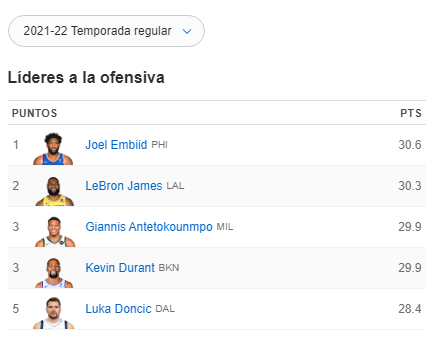

Aunque la faceta ofensiva representa solo uno de los numerosos aspectos en el juego del baloncesto, es innegable que los partidos se ganan al anotar puntos, y en la temporada 2022, **LeBron James** se destacó en esta habilidad, convirtiéndolo en el **jugador más valioso** para su equipo. Sin embargo, la razón por la cual no recibió tantos votos está vinculada a consideraciones narrativas y a la percepción de **LeBron James** como un jugador de avanzada edad para los estándares de la liga (38 años en ese momento). Esto subraya la **subjetividad** inherente a este premio, demostrando que en algunos casos no solo las estadísticas son determinantes.

Luego está el caso de **Luka Dončić** que según nuestro modelo en la temporada 2023 este último ocupaba la tercera posición del podio, cosa que realmente no fue así (se puede ver su posición real [aquí](https://es.wikipedia.org/wiki/Anexo:Votaci%C3%B3n_del_MVP_de_la_NBA_2022-23)). A continuación mostramos una imagen del podio real para ganar el premio:

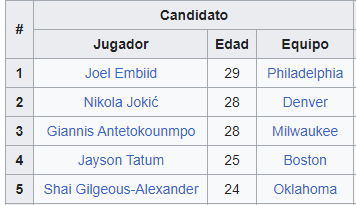

Podemos notar varias cosas, como que nuestro modelo posicionó a **Luka Dončić** por encima de **Giannis Antetokounmpo** o que el jugador **Jayson Tatum** directamente no entró al podio. Estas cosas ya las sabemos con anterioridad cuando mencionamos que nuestro modelo tiene problema para colocar a jugadores en puestos inferiores.


Al cuestionar la posición que **Jayson Tatum** ocupó según nuestro modelo, nos encontramos con un caso menos extremo que el de **Devin Booker**, ya que Tatum se ubicó en la **séptima posición** de la tabla, no tan distante del podio:

In [ ]:
mostrar_podio_MVP(temporada = 2023, y_pred = y_test_pred, df_base = df_data_jugadores_test, cant_jugadores = 7)

,season,player,mvp_share,y_pred
306,2023,Joel Embiid,0.915,0.432154
506,2023,Nikola Jokić,0.674,0.361984
422,2023,Luka Dončić,0.010,0.283334
207,2023,Giannis Antetokounmpo,0.606,0.224493
588,2023,Shai Gilgeous-Alexander,0.046,0.211966
301,2023,Jimmy Butler,0.003,0.162379
291,2023,Jayson Tatum,0.280,0.159920


La explicación para esto sería relativamente similar a la de **Devin Booker**: **Jayson Tatum** jugó en **Boston Celtics** durante la temporada 2023, un equipo con una plantilla sólida, situación que hizo que él individualmente **no fuera lider** en tantas estadísticas. Podemos afirmar que el hecho de que entre las variables predictoras que utilizamos para entrenar nuestro modelo no se encuentre ninguna que aporte alguna métrica sobre el **rendimiento del equipo** en el que estuvo el jugador afectó significativamente las predicciones.

De vuelta, volviendo a **Luka Dončić** tenemos un caso similar a **LeBron James**, un jugador el cual era el más valioso para su equipo (**Dallas Mavericks**) en la temporada 2022 y fue lider en numerosas estadísticas. A continuación dejamos una imagen que muestra dos aspectos en los cuales **Dončić** estuvo entre los más destacados de la liga:

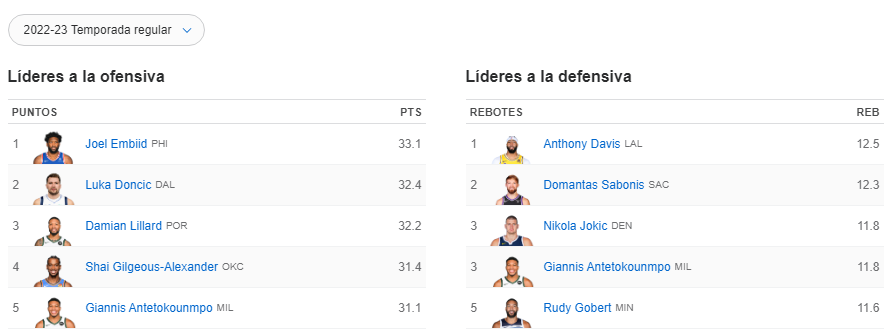

Nos encontramos ante el caso de un jugador con una notable capacidad tanto en el aspecto ofensivo como defensivo, aspectos que, aunque no son la totalidad del baloncesto, indudablemente desempeñan roles determinantes en el juego. Al considerar el motivo por el cual no recibió tantos votos, surge una situación que podría justificarlo: su equipo, los **Dallas Mavericks**, finalizó la temporada regular en una **posición bastante baja** (se puede verificar [aquí](https://www.espn.com.ar/basquetbol/nba/posiciones/_/temporada/2023)). En general, el premio MVP rara vez se otorga a jugadores cuyos equipos han concluido la temporada en posiciones desfavorables, presentando así otro ejemplo en el que, a pesar de las estadísticas que indican una gran influencia individual, **la realidad del desempeño del equipo puede afectar la percepción del jugador en la carrera por el MVP**.

# Conclusiones

En términos generales, estamos satisfechos con los logros obtenidos por nuestro modelo y la comprensión que nos brindó sobre el premio MVP. Al ponerlo a prueba con los datos de prueba, exploramos diversos aspectos y desafíos que enfrentó nuestro modelo, llegando a la conclusión de la marcada subjetividad del premio. Se hizo evidente que las estadísticas positivas no siempre son el único factor determinante en la valoración de un jugador, y que la narrativa de cada temporada ejerce una influencia significativa.

Ahora que hemos completado nuestro trabajo, sin más que agregar, ¡gracias por haberlo revisado!.